In [3]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim

In [7]:
def Prior(p):
    return np.piecewise(p, [p>=0 and p<=1,p<0 and p>1],[lambda p:1.,lambda p:0.])
Prior = np.vectorize(Prior)

In [9]:
Prior(2.0)

array(0.)

In [11]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [12]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [13]:
p = np.linspace(0,1,1000)
r = 7
n = 10
Pos = Posterior(p,r,n)

In [15]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.0007575757575757576

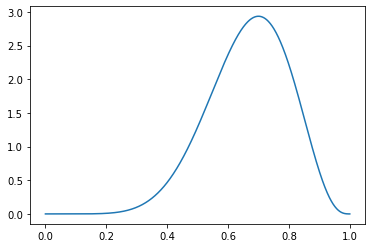

In [16]:
plt.plot(p,Pos/I)

In [17]:
index = np.where(np.amax(Pos)==Pos)
hatp = p[index][0]
hatp

0.6996996996996997